# Lab 3

## Read the dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("resources/nyc_january_1895-2018.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     124 non-null    int64  
 1   Value    124 non-null    float64
 2   Anomaly  124 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 3.0 KB


In [4]:
df

,Date,Value,Anomaly
0,189501,28.7,-2.9
1,189601,27.9,-3.7
2,189701,28.8,-2.8
3,189801,33.3,1.7
4,189901,29.3,-2.3
...,...,...,...
119,201401,28.7,-2.9
120,201501,30.0,-1.6
121,201601,34.5,2.9
122,201701,38.1,6.5


## Data Preparation

#### Rename columns

In [5]:
df = df.rename(columns={'Value': 'Temperature'})

#### Remove the last two digits of the 'Date' column

In [6]:
df['Date'] =  df['Date']//100

In [7]:
df.head()

,Date,Temperature,Anomaly
0,1895,28.7,-2.9
1,1896,27.9,-3.7
2,1897,28.8,-2.8
3,1898,33.3,1.7
4,1899,29.3,-2.3


## Build Models

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import numpy as np

In [9]:
X_train, x_test, y_train, y_test = train_test_split(
    df['Date'].values.reshape((-1, 1)),
    df['Temperature'],
    test_size=0.25, 
    random_state=27
)

In [10]:
model = LinearRegression().fit(X=X_train, y=y_train)

In [11]:
model.coef_

array([0.02125731])

In [12]:
model.intercept_

-10.071312365211138

### Test Model

In [13]:
predictions = model.predict(x_test)
predictions

array([31.63552788, 32.69839333, 31.42295479, 31.76307174, 31.99690214,
       31.69929981, 30.40260396, 31.59301326, 30.46637589, 31.06158054,
       31.2103817 , 30.84900745, 32.03941675, 30.78523552, 30.33883203,
       31.6780425 , 31.78432905, 32.08193137, 32.74090795, 32.29450446,
       32.46456293, 32.48582024, 30.21128818, 31.4442121 , 30.59391974,
       32.71965064, 31.38044017, 31.12535247, 30.67894898, 31.93313021,
       32.52833486])

In [14]:
results = pd.DataFrame({'Prediction':predictions, 'Actual Value':y_test})
results.head(5)

,Prediction,Actual Value
67,31.635528,31.8
117,32.698393,37.3
57,31.422955,35.2
73,31.763072,26.0
84,31.996902,32.0


#### Future temperature prediction

In [19]:
model.predict(np.array([2019, 2020, 2021, 2022]).reshape((-1,1)))

array([32.84719449, 32.8684518 , 32.88970911, 32.91096642])

#### Past temperature prediction

In [20]:
model.predict(np.array([1894, 1893, 1892, 1891, 1890 ]).reshape((-1,1)))

array([30.19003087, 30.16877356, 30.14751625, 30.12625894, 30.10500163])

# Data Vizualization

In [21]:
import seaborn as sns

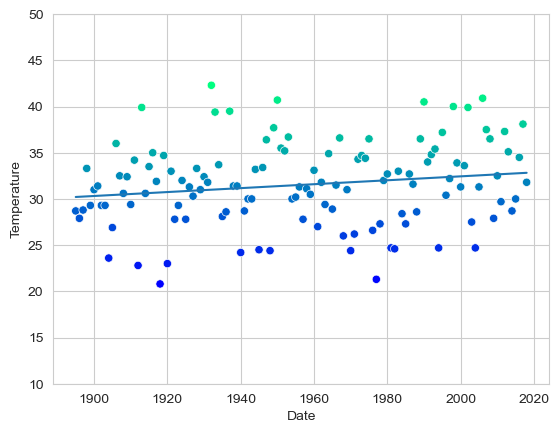

In [22]:
sns.set_style('whitegrid')
plot = sns.scatterplot(x = "Date", y ="Temperature", data=df, palette='winter',
                      hue='Temperature', legend=False)
plot.set_ylim(10, 50)

# Draw regression line
x = np.array([min(df['Date']), max(df['Date'])])
y = model.predict(x.reshape((-1, 1)))
line = plt.plot(x, y)